In [1]:
from imu_calibration import calibrator,dataCollector
from ellipsoid_fit_python.ellipsoid_fit import ellipsoid_plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import qwiic_icm20948
import ipywidgets as widgets

In [2]:
collector = dataCollector()

pause = widgets.Button(description='Pause')
pause.on_click(collector.togglePauseData)
stop = widgets.Button(description='Stop')
stop.on_click(collector.stop)
display(pause)
display(stop)

Button(description='Pause', style=ButtonStyle())

Button(description='Stop', style=ButtonStyle())

In [3]:
collector.start()

In [4]:
#accel,gyro,mag = collector.getRawData()
#print(accel)

In [4]:
accelCal,magCal = collector.getCalibration()

In [5]:
accel,gyro,mag = collector.getRawData()
normalized = accelCal.correct(accel)
magnorm = magCal.correct(mag)

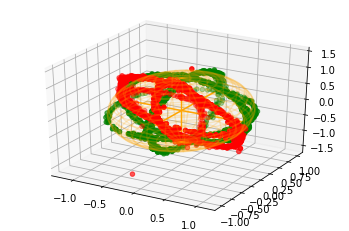

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normalized[:, 0], normalized[:, 1],normalized[:, 2], marker='o', color='r')
ax.scatter(magnorm[:, 0], magnorm[:, 1],magnorm[:, 2], marker='o', color='g')
ellipsoid_plot([0, 0, 0], [1, 1, 1], np.identity(3), ax=ax, plot_axes=True, cage_color='orange')
plt.show()

In [7]:
accelCal.center


array([0.03610293, 0.05574535, 0.06814677])

In [8]:
accelCal.transformation

array([[ 1.0781034 , -0.21431702, -0.07403659],
       [-0.21431702,  0.71177901, -0.24391956],
       [-0.07403659, -0.24391956,  1.04424741]])

In [9]:
magCal.center

array([ -8.70981008, -12.91955642,  17.3433582 ])

In [10]:
magCal.transformation

array([[ 0.03083491, -0.00050753, -0.00018444],
       [-0.00050753,  0.03017014, -0.00017897],
       [-0.00018444, -0.00017897,  0.03039004]])

In [11]:
mag[1,:]

array([23.9, -9.9, 11.1])

In [16]:
max(np.linalg.norm(magnorm,axis=1))

1.0872680317553545

In [17]:
min(np.linalg.norm(magnorm,axis=1))

0.9327834763893585

In [18]:
accelCal.center.tofile('accelCenter')
accelCal.transformation.tofile('accelTrans')
magCal.center.tofile('magCenter')
magCal.transformation.tofile('magTrans')

In [19]:
print(accelCal.center)
print(accelCal.transformation)
print(magCal.center)
print(magCal.transformation)

[0.03610293 0.05574535 0.06814677]
[[ 1.0781034  -0.21431702 -0.07403659]
 [-0.21431702  0.71177901 -0.24391956]
 [-0.07403659 -0.24391956  1.04424741]]
[ -8.70981008 -12.91955642  17.3433582 ]
[[ 0.03083491 -0.00050753 -0.00018444]
 [-0.00050753  0.03017014 -0.00017897]
 [-0.00018444 -0.00017897  0.03039004]]


In [20]:
?calibrator

In [23]:
accelCal2 = calibrator(np.fromfile('accelCenter'),np.fromfile('accelTrans').reshape(3,3),1)
magCal2 = calibrator(np.fromfile('magCenter'),np.fromfile('magTrans').reshape(3,3),1)

In [24]:
print(accelCal2.center)
print(accelCal2.transformation)
print(magCal2.center)
print(magCal2.transformation)

[0.03610293 0.05574535 0.06814677]
[[ 1.0781034  -0.21431702 -0.07403659]
 [-0.21431702  0.71177901 -0.24391956]
 [-0.07403659 -0.24391956  1.04424741]]
[ -8.70981008 -12.91955642  17.3433582 ]
[[ 0.03083491 -0.00050753 -0.00018444]
 [-0.00050753  0.03017014 -0.00017897]
 [-0.00018444 -0.00017897  0.03039004]]
